# 03. Convolution Neural Networks and Computer Vision with TensorFlow

Going to cover:
* Getting a dataset to work
* Architecture of convolution neural network
* A quick end-to-end example
* Steps in modelling for binary image classification with CNNs
    * Becoming one with the data
    * Preparing data for modelling
    * Creating a CNN model
    * Fitting a model
    * Evaluating a model
    * Improving a model
    * Making a prdiction with trained model
* Steps in modelling for multi-class image clasfication with CNNs
* Same as above (With different dataset)

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
x, y = make_circles(n_samples, noise=0.03, random_state=42)

In [2]:
# Check out features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":x[:, 0], "X1":x[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


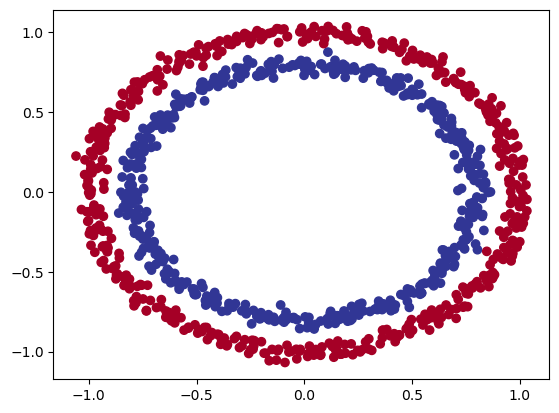

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shape

In [6]:
# Check the shape of features and labels
x.shape, y.shape

((1000, 2), (1000,))

## Steps in modeling
1. Create or import a model
2. Compile the model
3. Fit the model
4. evaluate the model
5. Tweak
6. Evaluate...

In [7]:
import tensorflow as tf
# Set random seeds
tf.random.set_seed(42)
# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])



# Fit the model
model_1.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 3s 4ms/step - loss: 1.5076 - accuracy: 0.4730
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7109 - accuracy: 0.4920
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7007 - accuracy: 0.4910
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6961 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.4710


In [8]:
# Traning for longer time
model_1.fit(x, y, epochs=200, verbose=0)
model_1.evaluate(x, y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [9]:
# Set the random seeds
tf.random.set_seed(42)

# Create a model with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])



# Fit the model
model_2.fit(x, y, epochs=100, verbose=0)

In [10]:
# Evaluate the model
model_2.evaluate(x, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5000


[0.6934041380882263, 0.5]

## Improving the model
1. Create a model with more layers
2. compiling model with differnt optimizer
3. Fitting the model

In [11]:
# Set random seeds
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_3.fit(x, y, epochs=100, verbose=0)

In [12]:
# Evaluate the model
model_3.evaluate(x, y)

32/32 [==============================] - 0s 5ms/step - loss: 0.7003 - accuracy: 0.5010


[0.7002579569816589, 0.5009999871253967]

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, x, y):
    """
    Plot the decision boundary created by a model prediction on x.
    """

    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Create x value
    x_in = np.c_[xx.ravel(), yy.ravel()]  # stack 2d arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("Multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()


313/313 [==============================] - 1s 3ms/step
Binary classification


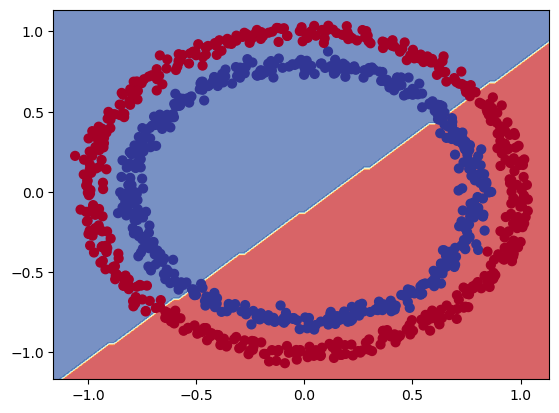

In [14]:
# Check out prediction 
plot_decision_boundary(model=model_3, x=x, y=y)

In [15]:
# See if can be used for regression problem..
tf.random.set_seed(42)

# Create some regression data
x_regression = tf.range(10, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 100

# Split regression data into training and test sets
x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[152:]

# Fit model to the regression data
#model_3.fit(x_reg_train, y_reg_train, epochs=100)

In [16]:
# Set random seeds
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
model_3.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 419.8174 - mae: 419.8174
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 304.1647 - mae: 304.1647
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 192.4605 - mae: 192.4605
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 76.3309 - mae: 76.3309
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 62.5024 - mae: 62.5024
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 87.3177 - mae: 87.3177
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 61.1264 - mae: 61.1264
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 39.7522 - mae: 39.7522
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 43.2815 - mae: 43.2815
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 37.3880 - mae: 37.3880
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 5ms/step


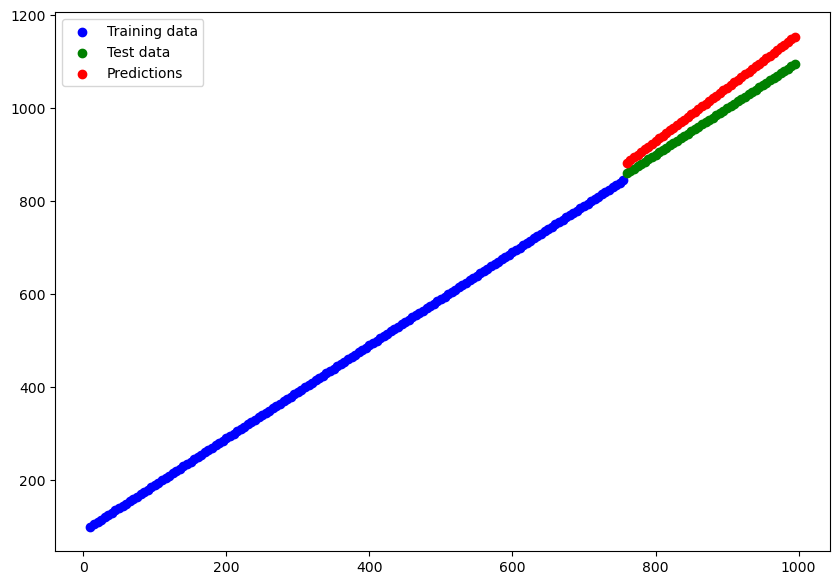

In [17]:
# Make predictions with our trained model
y_reg_prads = model_3.predict(x_reg_test)

# plot the model's predictions against regression data
plt.figure(figsize=(10, 7))
plt.scatter(x_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(x_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(x_reg_test, y_reg_prads, c="r", label="Predictions")
plt.legend();

### The missing piece: Non-linearity

In [18]:
# Set the random seeds
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(x, y, epochs=100)

Epoch 1/100


c:\Users\Vass\anaconda3\envs\tf_env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


32/32 [==============================] - 1s 6ms/step - loss: 4.3051 - accuracy: 0.4640
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 4.2630 - accuracy: 0.4620
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 4.2227 - accuracy: 0.4610
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 4.2064 - accuracy: 0.4620
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1922 - accuracy: 0.4640
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1684 - accuracy: 0.4640
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1412 - accuracy: 0.4650
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1162 - accuracy: 0.4660
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 4.0652 - accuracy: 0.4670
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 4.0452 - accuracy: 0.4660
Epoch 11/100
32/32 [=

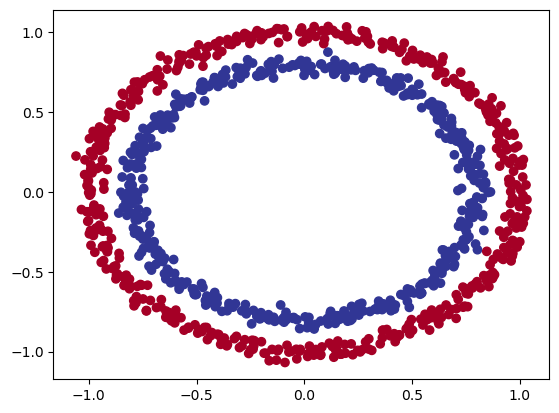

In [19]:
# Check out the data

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 3ms/step
Binary classification


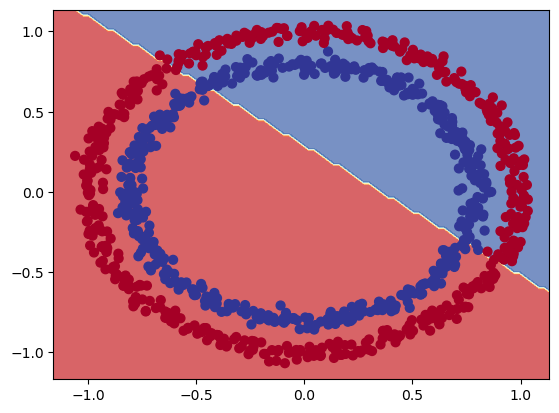

In [20]:
# Check the decision boundary for last model
plot_decision_boundary(model=model_4, x=x, y=y)

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(model=model_4, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Visualizing our model's predictions

# ---------------------------------------------------------------------

# Working with a larger example ( Multiclass classification)

In [22]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data already has been sorted into tranining and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [23]:
# Show the first training example
print(f"Training salmpe:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training salmpe:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [24]:
# Check the shape of the data
train_data[0].shape, train_labels[0].shape

((28, 28), ())

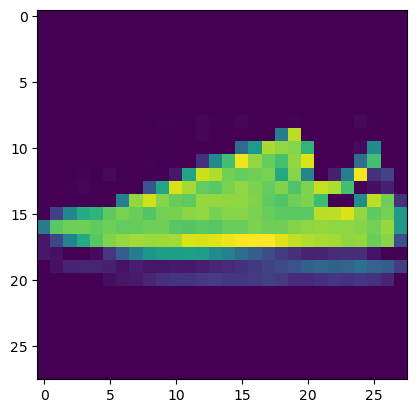

In [25]:
# Plot a single data
import matplotlib.pyplot as plt
plt.imshow(train_data[6])

In [26]:
# Check the sample label
train_labels[7]

2

In [27]:
# Create a small list
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

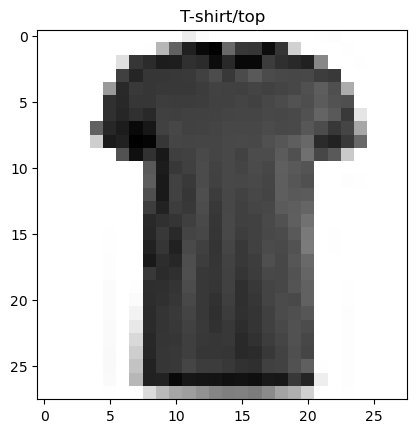

In [28]:
# Plot an example image and it's labels
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

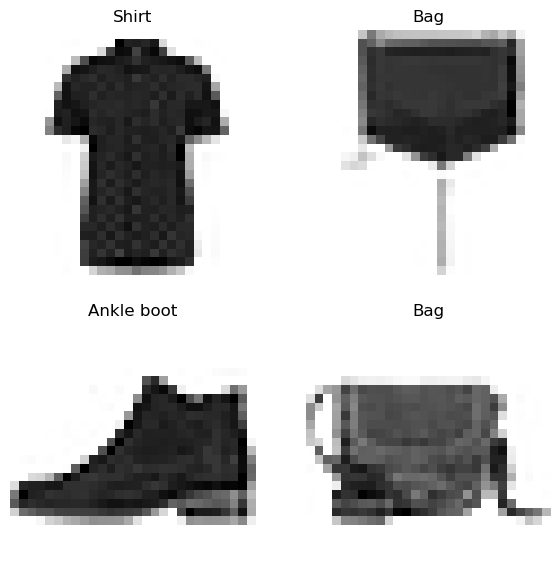

In [29]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a Multiclass Classification Model

For multi-class classification model have similar architecture to binary classifers :
* Input shape = 28 * 28 (shape of the one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrosstentropy()
* Output layer activation = Softmax (not sigmoid)

In [30]:
# Ste random seeds
tf.random.set_seed(42)

# Create the model
model_11  = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3711 - accuracy: 0.1411 - val_loss: 2.1398 - val_accuracy: 0.1688
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.0467 - accuracy: 0.1869 - val_loss: 1.9655 - val_accuracy: 0.2016
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.9317 - accuracy: 0.2079 - val_loss: 1.8109 - val_accuracy: 0.2495
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.7375 - accuracy: 0.2541 - val_loss: 1.7335 - val_accuracy: 0.2220
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.6736 - accuracy: 0.2743 - val_loss: 1.6593 - val_accuracy: 0.2707
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.6574 - accuracy: 0.2779 - val_loss: 1.7556 - val_accuracy: 0.2107
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.6188 - accuracy: 0.2820 - val_loss: 1.5823 - val_accu

In [31]:
model_11.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 4)                 3140      
                                                                 
 dense_11 (Dense)            (None, 4)                 20        
                                                                 
 dense_12 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [33]:
# Training and tesing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# Check the min and max values of the scaled data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [34]:
# Set random seeds
tf.random.set_seed(42)

# Create the model
model_12  = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1523 - accuracy: 0.5772 - val_loss: 0.7747 - val_accuracy: 0.7405
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7184 - accuracy: 0.7558 - val_loss: 0.7051 - val_accuracy: 0.7657
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6603 - accuracy: 0.7754 - val_loss: 0.6594 - val_accuracy: 0.7769
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6306 - accuracy: 0.7857 - val_loss: 0.6425 - val_accuracy: 0.7854
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6135 - accuracy: 0.7902 - val_loss: 0.6227 - val_accuracy: 0.7941
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6014 - accuracy: 0.7954 - val_loss: 0.6469 - val_accuracy: 0.7805
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5915 - accuracy: 0.7982 - val_loss: 0.6356 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

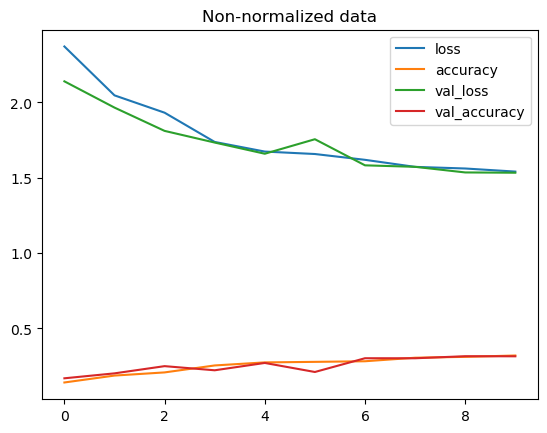

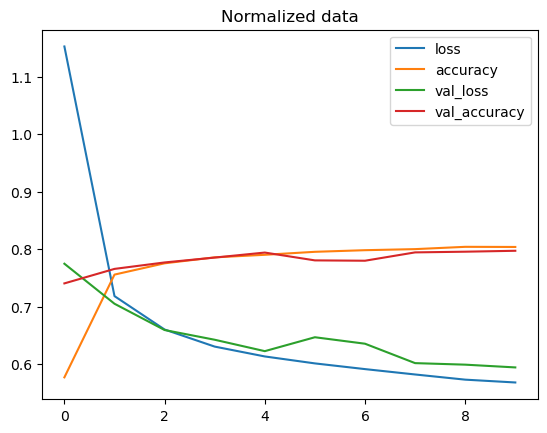

In [36]:
import pandas as pd
# plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")


## Finding the ideal learning rate

In [39]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

# Create a learning rate callback
lr_sheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels), callbacks=[lr_sheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1701 - accuracy: 0.5863 - val_loss: 0.8542 - val_accuracy: 0.7147 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7549 - accuracy: 0.7355 - val_loss: 0.7514 - val_accuracy: 0.7436 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6841 - accuracy: 0.7560 - val_loss: 0.6971 - val_accuracy: 0.7483 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6598 - accuracy: 0.7636 - val_loss: 0.6831 - val_accuracy: 0.7510 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6446 - accuracy: 0.7667 - val_loss: 0.6628 - val_accuracy: 0.7669 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6345 - accuracy: 0.7693 - val_loss: 0.6666 - val_accuracy: 0.7652 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'Finding the ideal learning rate')

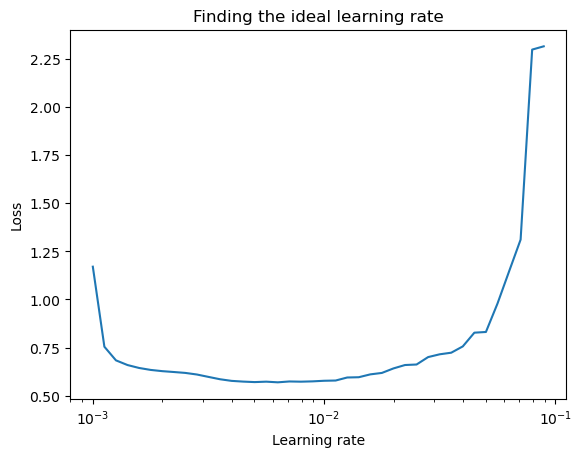

In [41]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 ** (np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [42]:
# Refit  the model with the ideal learning rate
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1146 - accuracy: 0.6305 - val_loss: 0.8390 - val_accuracy: 0.7115
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7409 - accuracy: 0.7310 - val_loss: 0.7224 - val_accuracy: 0.7264
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6541 - accuracy: 0.7691 - val_loss: 0.6615 - val_accuracy: 0.7769
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6033 - accuracy: 0.7958 - val_loss: 0.6218 - val_accuracy: 0.7951
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5726 - accuracy: 0.8056 - val_loss: 0.6065 - val_accuracy: 0.7968
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5531 - accuracy: 0.8117 - val_loss: 0.5989 - val_accuracy: 0.7992
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5401 - accuracy: 0.8184 - val_loss: 0.5738 - val_accuracy: